# 1. A. 1. Data set of good+bad temperatures

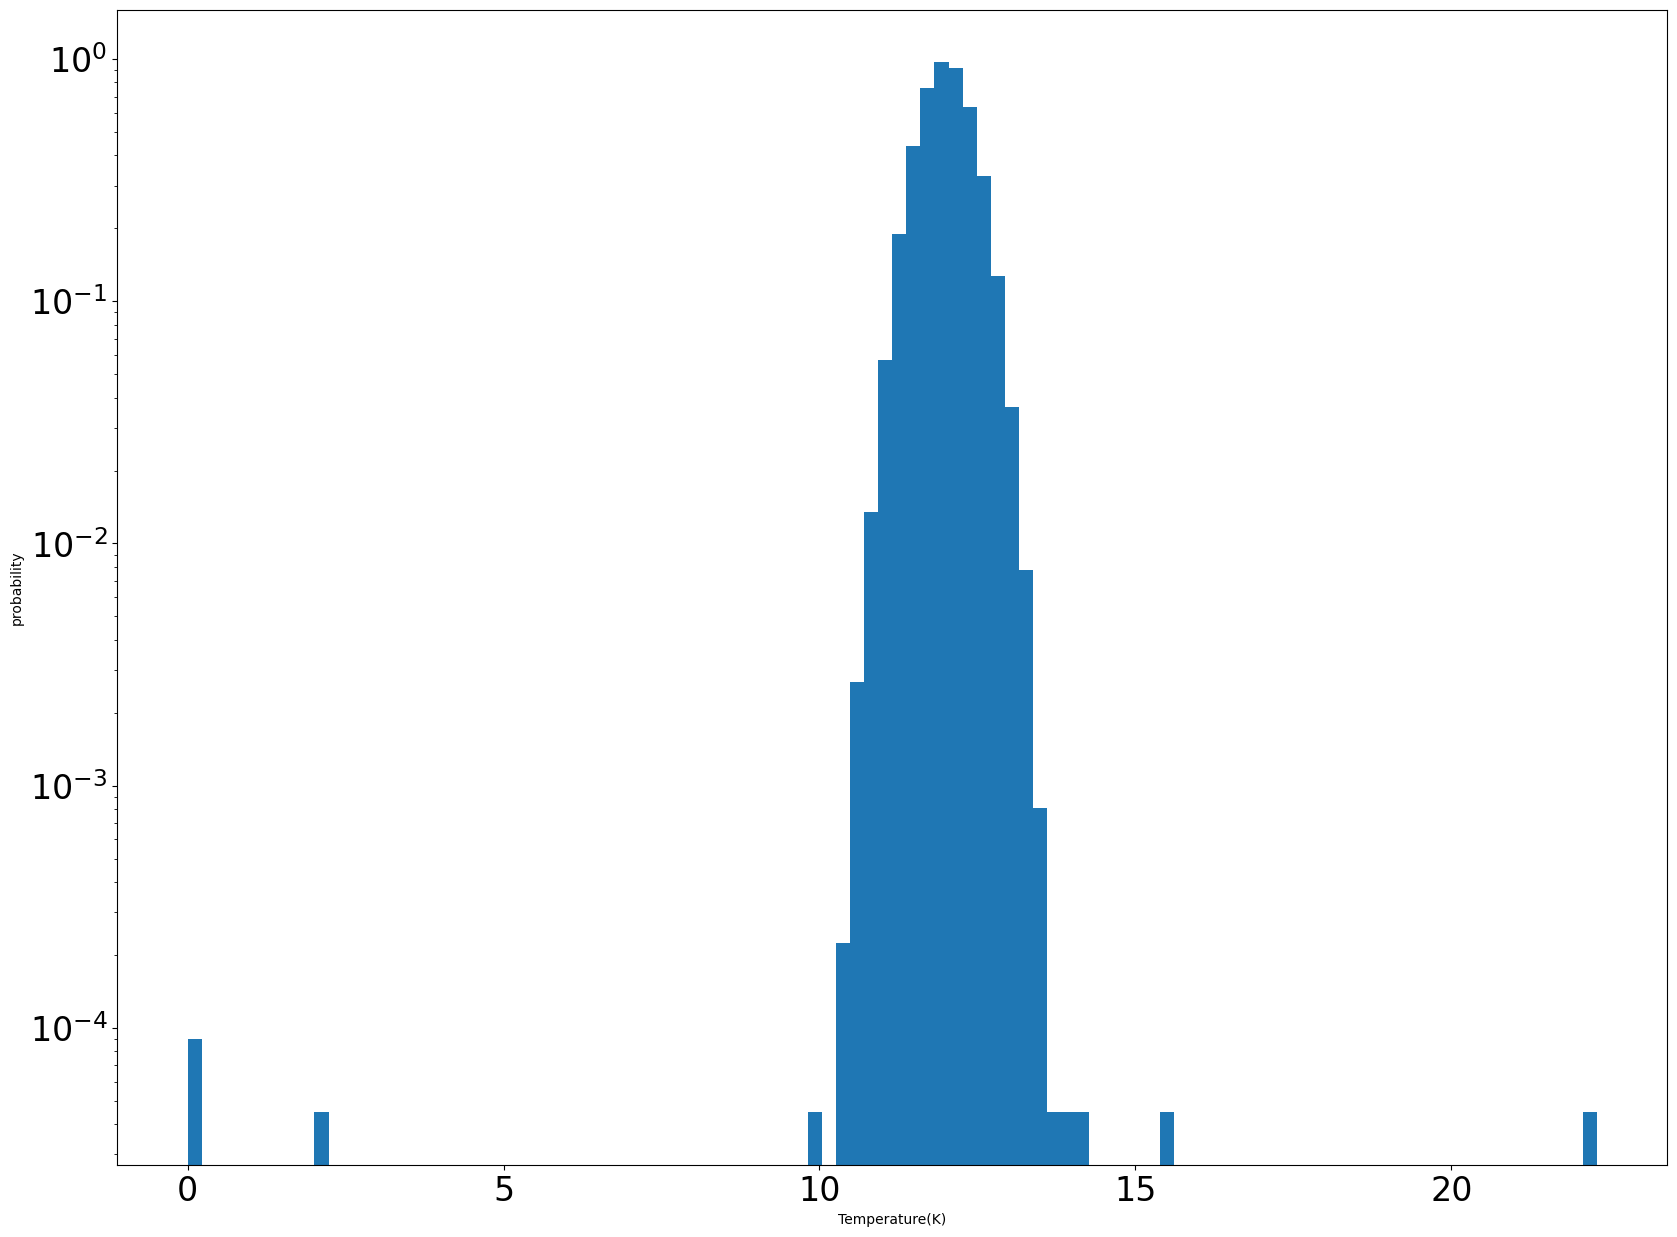

In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.xlabel('Temperature(K)')
plt.ylabel('probability')
plt.show()

# 1. A. 2. Statistical question

To determine if we want to throw away an abnormal data point, we use the criteria that the data would be discarded if the probability of reading this specific temperature lies outside of 5 sigmas. 

# 1. A. 3. State question in math

Throw-away criteria: $$\begin{align*}
P(data)&=\int_{data}^{\infty} pdf(data)dx=\int_{x=data}^{\infty}\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}} dx\\
P(5\sigma)&=\int_{x=5\sigma}^{\infty}\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}} dx\\
P(data)&\leq P(5\sigma)
\end{align*}
$$

# 1. A. 4. Apply your statistical test and construct a truth table

In [59]:
from scipy.stats import norm

fsig=1-norm.cdf(5, loc=0, scale=1)
def screenbaddata(l):
    discard=[]
    for i in range(len(l)):   
        k=1-norm.cdf(l[i], loc=12, scale=0.4)
        if k <= fsig:
            print(l[i])
            discard.append({i,l[i]})
    return discard

screenbaddata(d)


14.087348325213659
15.6
22.3


[{14.087348325213659, 46809}, {15.6, 100005}, {22.3, 100006}]

Comparing the bad values I found to the inserted bad values, the truth table reads: 
$$
\begin{aligned}
& \text {Table 1.1. Truth table for screening data}\\
&\begin{array}{ccc}
\hline \hline  & \text { True T } & \text { Bad T} \\
\hline 
\text{Your test good} & 100000 & 5 \\
\text{Your test bad} & 1 & 2 \\
\hline
\end{array}
\end{aligned}
$$

# B. How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

If I adopt a different discard criteria, say a different number of sigmas, I would throw out the number of good data in the following table:
$$
\begin{aligned}
& \text {Table 1.1. Truth table for screening data}\\
&\begin{array}{ccc}
\hline \hline Threshold & \text { 3 }\sigma & \text { 4 }\sigma & \text { 5 }\sigma  & \text { 6 }\sigma & \text { 7 }\sigma\\
\hline 
\text{# of good data been discarded} & 143 &  3 & 1 & 0 & 0\\
\hline
\end{array}
\end{aligned}
$$
It is evident that the higher the sigmas required, the less number of good data would be thrown out. 

Four sigmas

In [60]:
fsig=1-norm.cdf(4, loc=0, scale=1)
def screenbaddata(l):
    discard=[]
    for i in range(len(l)):   
        k=1-norm.cdf(l[i], loc=12, scale=0.4)
        if k <= fsig:
            print(l[i])
            discard.append({i,l[i]})
    return discard

screenbaddata(d)

13.864625763744264
14.087348325213659
13.718770271592657
15.6
22.3


[{13.864625763744264, 12018},
 {14.087348325213659, 46809},
 {13.718770271592657, 67630},
 {15.6, 100005},
 {22.3, 100006}]

Three sigmas

In [64]:
fsig=1-norm.cdf(3, loc=0, scale=1)
def screenbaddata(l):
    discard=[]
    for i in range(len(l)):   
        k=1-norm.cdf(l[i], loc=12, scale=0.4)
        if k <= fsig:
            discard.append({i,l[i]})
    return discard

tsig=screenbaddata(d)
len(tsig)

145

In [67]:
tsig

[{13.227814973121705, 410},
 {13.217280162316523, 1031},
 {13.468310311375925, 1160},
 {13.216769896016515, 1455},
 {13.293811385060621, 2075},
 {13.205526234924001, 3409},
 {13.277717118865231, 4374},
 {13.320882313708415, 4957},
 {13.361388796783693, 5049},
 {13.22262801998183, 5067},
 {13.281134382188034, 6282},
 {13.250584844434025, 6550},
 {13.597820564044193, 6733},
 {13.267115278338498, 8754},
 {13.378111184349914, 9205},
 {13.227559022997331, 9408},
 {13.461809001566056, 9952},
 {13.207549472182322, 10385},
 {13.23303816505662, 10695},
 {13.36987564802034, 11005},
 {13.377674969141573, 11992},
 {13.864625763744264, 12018},
 {13.31657683330855, 12956},
 {13.231638613686787, 14149},
 {13.471204849636697, 14244},
 {13.253107195708726, 14637},
 {13.290202914351116, 15576},
 {13.272721301122054, 16553},
 {13.363234916768421, 17282},
 {13.32974795766726, 18225},
 {13.253881629252165, 18312},
 {13.294177186883962, 19778},
 {13.325874958853905, 21344},
 {13.232515053241313, 21564},
 {1

Six sigmas

In [65]:
fsig=1-norm.cdf(6, loc=0, scale=1)
def screenbaddata(l):
    discard=[]
    for i in range(len(l)):   
        k=1-norm.cdf(l[i], loc=12, scale=0.4)
        if k <= fsig:
            discard.append({i,l[i]})
    return discard

screenbaddata(d)

[{15.6, 100005}, {22.3, 100006}]

Seven sigmas

In [66]:
fsig=1-norm.cdf(7, loc=0, scale=1)
def screenbaddata(l):
    discard=[]
    for i in range(len(l)):   
        k=1-norm.cdf(l[i], loc=12, scale=0.4)
        if k <= fsig:
            discard.append({i,l[i]})
    return discard

screenbaddata(d)

[{15.6, 100005}, {22.3, 100006}]

# C. Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There are chances of bad data getting in. It seems bad data cannot be eliminated by setting a higher sigma value. The number of bad data undetected versus screening criteria looks
$$
\begin{aligned}
& \text {Table 1.1. Truth table for screening data}\\
&\begin{array}{ccc}
\hline \hline Threshold & \text { 3 }\sigma & \text { 4 }\sigma & \text { 5 }\sigma  & \text { 6 }\sigma & \text { 7 }\sigma\\
\hline 
\text{# of bad data undetected} & 6 &  6 & 6 & 6 & 6\\
\hline
\end{array}
\end{aligned}
$$
It seems the mistakes of commission does not depend on the statistical threshold.

# 2. 1. Question in words

Given a value of the movement of a potential asteroid, what is significance of the detection? 

# 2.2. Question in math

$$\begin{align*}
&\text{The cumulative probability of this value is }\\
&P(data)=\int_{data}^{\infty} pdf(data)dx=\int_{r=data}^{\infty} r e^\frac{-r^{2}}{2}dr \,(r\geq 0) \\
&\text{On a Gaussian distribution, this cumulative probability corresponds to a sigma number of }\\
& X\sigma =\text{Inverse Gaussian CDF(P(data))}\\
& \text{We have a true movement when } X \sigma \geq P(5\sigma)
\end{align*}
$$

# 2.3. What distance in arcseconds represents a 5 sigma detection of motion?

To find the movement that corresponds to a 5 sigma detection, first find the probability of the 5 sigma detection, then integrate the inverse of the cumulative probability distribution of the movement:
$$ 5\sigma\text{ movement}=\text{Inverse Rayleigh CDF(P(5$\sigma$))}$$

In [70]:
P5sig=1-norm.cdf(5, loc=0, scale=1)
print(P5sig)

2.866515719235352e-07


In [71]:
from scipy.stats import rayleigh
rayleigh.ppf(P5sig, loc=0, scale=1)

0.0007571678981680416

# 3. 1. Question in words

What is the signficance of our moon shadow detection when 6800 cosmic rays is detected in 15 days? 

# 3. 2. Question in math

The expected background pdf is Poissonian, because the cosmic ray detector is a photon detector and photons follow Poisson statistics. We want to decide if the detection "6800 cosmic rays in 15 days" is produced by the background "1 cosmic ray per minute randomly" or some other astronomical events. 

The pdf of the 15-day background can be aprroximated as $$P(n)=15\times 24 \times 60\frac{e^{-\mu} \mu^{n}}{n !}=21600\frac{e^{-1}}{n !}$$ with the mean $$\mu=1$$.


The integral to find the probability that the background produces the signal is then $$P(\text{detection})=\int_{\text{detection}}^{\infty} pdf(data)dx=\sum_{n=detection}^{\infty} 21600\frac{e^{-1}}{n !} $$

The "integral" is discrete because the number of photons is discrete. 

Then we can convert the probability into the number of sigmas.

# 3.3 Convert to sigma

In [104]:
import mpmath
import math
from scipy.special import gamma, factorial

#summing up to a large number(not to infinity) 
#because I keep getting the error " 'mpf' object cannot be interpreted as an integer"

Pdet=0
for i in range(6800, 1000000):
     Pdet+=21600/(math.e*factorial(i))
        
print(Pdet)

0.0


The probability is essentially zero. The number of sigmas is then

In [108]:
stats.norm.ppf(Pdet, loc=0, scale=1)

-inf

It looks like the significance is higher than 5 sigma.